<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Pesquisa-PID/Implementa%C3%A7%C3%A3o-Algoritmos/Testes_Pesquisa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas, Módulos e Dados

In [1]:
pip install Unidecode

     |████████████████████████████████| 245kB 5.3MB/s 


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import spacy  
import nltk
nltk.download('stopwords')
import re  
from collections import defaultdict 
from unidecode import unidecode
import logging 
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#Criando Data Frame a partir dos dados.
data = pd.read_csv('dados-pesquisa.csv')
data = data[['created_at', 'text', 'lang']]

# Visualizando e Explorando os dados

In [4]:
#Visualizando as 5 primeiras linhas.
data.head()

,created_at,text,lang
0,Mon May 18 17:53:01 +0000 2020,"Tudo mudou na nossa forma de trabalhar, mas na...",pt
1,Mon May 18 17:52:17 +0000 2020,McDonald’s já reabriu lojas ao público https:/...,pt
2,Mon May 18 17:50:40 +0000 2020,"Sindicato, está atento em tudo o que envolve s...",pt
3,Mon May 18 17:49:17 +0000 2020,Nossos problemas da saúde definitivamente acab...,pt
4,Mon May 18 17:49:06 +0000 2020,Fábricas de todo o mundo se viram obrigadas a ...,pt


In [5]:
#Visualizando as 5 últimas linhas.
data.tail()

,created_at,text,lang
109959,Mon Jul 20 15:04:14 +0000 2020,porto alegre perigando a entrar em lockdown e ...,pt
109960,Mon Jul 20 15:03:35 +0000 2020,"Nunca que a Mídia vai falar isso!\nAMB, CFM e ...",pt
109961,Mon Jul 20 15:03:33 +0000 2020,@joaopiresrj Eu não sou cientista mas esse LOC...,pt
109962,Mon Jul 20 15:01:54 +0000 2020,Q&amp;A - Recessão ou Lockdown. O que é pior? ...,pt
109963,Mon Jul 20 15:01:38 +0000 2020,O prefeito de Los Angeles está preste a decret...,pt


In [6]:
#Verificando a estrutura inicial dos dados.
data.shape

(109964, 3)

**Podemos observar aproximadamente 110 mil linhas e 6 colunas.**

# Pré-Processando os dados

In [7]:
#Removendo dados duplicados na coluna de Texto e substituindo dentro do próprio Data Frame.
data.drop_duplicates(['text'], inplace=True)

In [8]:
#Verificando novamente a estrutura dos dados para observar a quantidade de dados únicos.
data.shape

(103364, 3)

6600 linhas foram removidas.

**Iremos trabalhar com os Dados de Texto, por isso, selecionaremos apenas a coluna associada ao conteúdo dos tweets.**

In [9]:
#Utilizando notação comum em estudos de Aprendizado de Máquina.
X = data['text']

In [10]:
#Visualizando as 15 primeiras linhas. 
X[:15]

0     Tudo mudou na nossa forma de trabalhar, mas na...
1     McDonald’s já reabriu lojas ao público https:/...
2     Sindicato, está atento em tudo o que envolve s...
3     Nossos problemas da saúde definitivamente acab...
4     Fábricas de todo o mundo se viram obrigadas a ...
5     @g1 @RedeGlobo @jornalhoje o governo de @jairb...
6     Lei N° 6666, nos #EUA, que pretende traçar e i...
7     https://t.co/mcftUwJr5F o governo precisa ser ...
8     Blockchain: a tecnologia que popularizou o #bi...
9     VOCÊS CONHECEM ALGUM PAÍS ALÉM DO BRASIL QUE T...
10    Itajuípe recebe o Centro Municipal de Isolamen...
11    📣 NOTÍCIA / NEWS / NOUVELLES \n\n🇵🇹 Manual de ...
12    Enquanto o governo Bolsonaro permanecer Irresp...
13    Faça a diferença! Seja um doador sem fronteira...
14    Manaus, maio de 2020. Reportagem sobre o colap...
Name: text, dtype: object

**Devido ao fato de os dados serem proveninentes de uma rede social, se faz necessária uma etapa de pré-processamento nos mesmos.**

In [11]:
def Preprocessing_data(instance):
      instance = re.sub(r"http\S+", "", instance).lower().replace('.', '').replace(';','').replace('-','').replace(':', '').replace(')', '').replace('(', '')
      stopwords = set(nltk.corpus.stopwords.words('portuguese'))
      words = [i for i in instance.split() if not i in stopwords]
      return (" ".join(words))

**Função que remove links, urls, sinais de pontuação, padroniza os caracteres como minúsculos e remove as stopwords através de um dos módulos da biblioteca NLTK.**

In [12]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [13]:
#remove_emoji('📣 notícia / news / nouvelles 🇵🇹 manual boas práticas – algarve clean &amp safe 🇬🇧 good practice guide')

In [14]:
#Aplicando a função na nossa base de dados.
X = [Preprocessing_data(i) for i in X]

In [15]:
X = [remove_emoji(i) for i in X]

In [16]:
#Visualizando novamente as 15 primeiras linhas, agora após o pré-processamento.
X[:15]

['tudo mudou forma trabalhar, nada mudou objetivo informar #jornalismo #imprensa…',
 'mcdonald’s reabriu lojas público #comida #covid19 #mcdonalds',
 'sindicato, atento tudo envolve saúde condições trabalho nessa pandemia #covid @spbancarios',
 'problemas saúde definitivamente acabaram #saude #forabolsonaro #covid',
 'fábricas todo mundo viram obrigadas dispensarem funcionários decorrência #covid19 antes m…',
 '@g1 @redeglobo @jornalhoje governo @jairbolsonaro vai socorrer ninguém vai enrolar! pois minto quer r…',
 'lei n° 6666, #eua, pretende traçar investigar percurso pessoas tivestes contatos, usand…',
 'governo precisa ser responsabilizado #covid #covid19',
 'blockchain tecnologia popularizou #bitcoin sendo testada combate #covid19 sistema capaz de…',
 'conhecem algum país além brasil torcida organizada coronavirus???? #covid #covid19',
 'itajuípe recebe centro municipal isolamento covid19 #covid19 #isolamentosocial #covid @rctitajuipe',
 ' notícia / news / nouvelles  manual boas p

In [17]:
import random
random.shuffle(X)

In [18]:
X

['goiás decreta lockdown obedece quer tá?',
 'notícias &amp atualizações #coronavirus perca nada c/ #podcasts offline',
 ' 2 meses lockdown  15 meses isolamento intermitente meia boca',
 'garimpo ilegal, conta nãofiscalização adotada governo federal',
 '@marcelustumulto @alessandrafoto dia 15 maio brasil chega 14817 mortes coronavírus passa 218 mil ca…',
 'talvez coronavírus, tô medo',
 '#novodia rafael elisa aproveito reportagem atual pergunta quanto tempo anticorpos contra covid…',
 'minas gerais 1752 mortes previsto hoje, pico #coronavírus estado reveja alguns depoimentos…',
 'covid19 oms prevê distribuição vacinas arranque segundo semestre 2021',
 'juscélio carmo apresenta conjunto sugestões combate coronavírus alagoinhas contesta higienização…',
 '1009699 brasileiros infectados coronavírus 48427 mortos 100% descaso parte governo bolsonaro',
 '@flinvestimentos @jdoriajr durante carnaval, havia confirmação único caso sequer novo coronavírus no…',
 'vídeo novo canal vem gente #lockdo

In [19]:
#Criando DataFrame com os dados pré-processados.
data_text = pd.DataFrame(data=X, columns=['text'])

In [20]:
data_text

,text
0,goiás decreta lockdown obedece quer tá?
1,notícias &amp atualizações #coronavirus perca ...
2,2 meses lockdown 15 meses isolamento intermi...
3,"garimpo ilegal, conta nãofiscalização adotada ..."
4,@marcelustumulto @alessandrafoto dia 15 maio b...
...,...
103359,"é, país realmente jeito! deus salva @ibaneisof..."
103360,oms quer evidências sobre transmissão coronaví...
103361,#caxiasdosul | caxias sul registra 17º óbito #...
103362,reforço contra #coronavírus @minsaude habilito...


In [21]:
data_text.text = data_text.text.apply(unidecode)

In [22]:
file_model = data_text.copy()
file_model = file_model[file_model.text.str.len()>1]

INFO - 13:11:52: NumExpr defaulting to 2 threads.


In [23]:
file_model

,text
0,goias decreta lockdown obedece quer ta?
1,noticias &amp atualizacoes #coronavirus perca ...
2,2 meses lockdown 15 meses isolamento intermi...
3,"garimpo ilegal, conta naofiscalizacao adotada ..."
4,@marcelustumulto @alessandrafoto dia 15 maio b...
...,...
103359,"e, pais realmente jeito! deus salva @ibaneisof..."
103360,oms quer evidencias sobre transmissao coronavi...
103361,#caxiasdosul | caxias sul registra 17o obito #...
103362,reforco contra #coronavirus @minsaude habilito...


In [24]:
#file_export = file_model.copy()
#file_export['old_title'] = file_export.title
#file_export.old_title = file_export.old_title.str.join(' ')
#file_export.title = file_export.title.apply(lambda x: ' '.join(bigram[x]))

In [25]:
#file_export[['title', 'rate']].to_csv('cleaned_dataset.csv', index=False)

In [26]:
#v = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [27]:
#teste = v.fit_transform(data_text['text'].apply(lambda x: np.str_(x)))
#teste

In [28]:
#data_text.to_csv('dados_preprocessados.csv', index=False)

In [29]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
#len(data_text['text']) * 0.7

In [31]:
#train_data = pd.DataFrame()
#test_data = pd.DataFrame()
#train_data['text'] = data_text['text'][:72354]
#test_data['text'] = data_text['text'][72354:]

In [32]:
#train_data

In [33]:
#test_data

# Transformando os Dados

In [34]:
#Importando módulos do Gensim, biblioteca que auxilia na implementação do Modelo Word2VEC.
from gensim.models.phrases import Phrases, Phraser

INFO - 13:11:53: 'pattern' package not found; tag filters are not available for English


In [35]:
#Quebrando as frases por palavra.
sent = [row.split() for row in data_text['text']]

In [36]:
#Visualizando a representação criada acima.
sent

[['goias', 'decreta', 'lockdown', 'obedece', 'quer', 'ta?'],
 ['noticias',
  '&amp',
  'atualizacoes',
  '#coronavirus',
  'perca',
  'nada',
  'c/',
  '#podcasts',
  'offline'],
 ['2',
  'meses',
  'lockdown',
  '15',
  'meses',
  'isolamento',
  'intermitente',
  'meia',
  'boca'],
 ['garimpo',
  'ilegal,',
  'conta',
  'naofiscalizacao',
  'adotada',
  'governo',
  'federal'],
 ['@marcelustumulto',
  '@alessandrafoto',
  'dia',
  '15',
  'maio',
  'brasil',
  'chega',
  '14817',
  'mortes',
  'coronavirus',
  'passa',
  '218',
  'mil',
  'ca...'],
 ['talvez', 'coronavirus,', 'to', 'medo'],
 ['#novodia',
  'rafael',
  'elisa',
  'aproveito',
  'reportagem',
  'atual',
  'pergunta',
  'quanto',
  'tempo',
  'anticorpos',
  'contra',
  'covid...'],
 ['minas',
  'gerais',
  '1752',
  'mortes',
  'previsto',
  'hoje,',
  'pico',
  '#coronavirus',
  'estado',
  'reveja',
  'alguns',
  'depoimentos...'],
 ['covid19',
  'oms',
  'preve',
  'distribuicao',
  'vacinas',
  'arranque',
  'segun

In [37]:
phrases = Phrases(sent, min_count=1, progress_per=10000)

INFO - 13:11:53: collecting all words and their counts
INFO - 13:11:53: PROGRESS: at sentence #0, processed 0 words and 0 word types
INFO - 13:11:53: PROGRESS: at sentence #10000, processed 100650 words and 97239 word types
INFO - 13:11:53: PROGRESS: at sentence #20000, processed 201174 words and 173046 word types
INFO - 13:11:54: PROGRESS: at sentence #30000, processed 301929 words and 241183 word types
INFO - 13:11:54: PROGRESS: at sentence #40000, processed 402580 words and 305525 word types
INFO - 13:11:54: PROGRESS: at sentence #50000, processed 503074 words and 365760 word types
INFO - 13:11:54: PROGRESS: at sentence #60000, processed 604182 words and 423890 word types
INFO - 13:11:55: PROGRESS: at sentence #70000, processed 705034 words and 479164 word types
INFO - 13:11:55: PROGRESS: at sentence #80000, processed 805513 words and 532747 word types
INFO - 13:11:55: PROGRESS: at sentence #90000, processed 906204 words and 584875 word types
INFO - 13:11:55: PROGRESS: at sentence #

In [38]:
#Construindo modelo baseado em Bigram, para a detecção de palavras (únicas) que são formadas por outras duas.
bigram = Phraser(phrases)

INFO - 13:11:55: source_vocab length 652521
INFO - 13:11:59: Phraser added 50000 phrasegrams
INFO - 13:12:01: Phraser built with 59027 phrasegrams


In [39]:
sentences = bigram[sent]

In [40]:
len(sentences)

103364

In [41]:
#Percorrendo os dados e fazendo uma contagem para verificar as palavras mais frequentes da base.
word_freq = defaultdict(int)
for sent in sentences:
    for i in sent:
        word_freq[i] += 1
len(word_freq)

150293

In [42]:
#Exibindo as 10 palavras mais frequentes da base de dados.
sorted(word_freq, key=word_freq.get, reverse=True)[:10]

['coronavirus',
 'covid19',
 'lockdown',
 'brasil',
 'casos',
 'pra',
 '#coronavirus',
 'mortes',
 'contra',
 'sobre']

# Criando o Modelo Word2VEC.

In [43]:
#Importando biblioteca e módulo do Gensim, para a implementação do Word2VEC.
import multiprocessing

from gensim.models import Word2Vec

In [44]:
#Função que conta o número de cores da máquina.
cores = multiprocessing.cpu_count()

In [45]:
#Instanciando modelo Word2VEC a partir dos mesmos parâmetros estabelecidos pelo artigo.
w2v_model = Word2Vec(min_count=3,
                     window=6,
                     size=300,
                     sample=1e-5, 
                     alpha=0.06, 
                     min_alpha=0.0001, 
                     negative=10,
                     workers=multiprocessing.cpu_count()-1)

In [46]:
#Construindo vocabulário a partir das sentenças.
w2v_model.build_vocab(sentences, progress_per=10000)

INFO - 13:12:04: collecting all words and their counts
INFO - 13:12:04: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 13:12:05: PROGRESS: at sentence #10000, processed 79687 words, keeping 33798 word types
INFO - 13:12:05: PROGRESS: at sentence #20000, processed 159314 words, keeping 55494 word types
INFO - 13:12:05: PROGRESS: at sentence #30000, processed 238952 words, keeping 72655 word types
INFO - 13:12:06: PROGRESS: at sentence #40000, processed 318698 words, keeping 87528 word types
INFO - 13:12:06: PROGRESS: at sentence #50000, processed 398298 words, keeping 100494 word types
INFO - 13:12:06: PROGRESS: at sentence #60000, processed 478302 words, keeping 112124 word types
INFO - 13:12:07: PROGRESS: at sentence #70000, processed 557807 words, keeping 122296 word types
INFO - 13:12:07: PROGRESS: at sentence #80000, processed 637155 words, keeping 131646 word types
INFO - 13:12:07: PROGRESS: at sentence #90000, processed 716636 words, keeping 140139 word 

# Treinando o Modelo Word2VEC

In [47]:
#Treiando modelo Word2VEC.
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

INFO - 13:12:17: training model with 1 workers on 42507 vocabulary and 300 features, using sg=0 hs=0 sample=1e-05 negative=10 window=6
INFO - 13:12:18: EPOCH 1 - PROGRESS: at 18.21% examples, 63560 words/s, in_qsize 2, out_qsize 0
INFO - 13:12:19: EPOCH 1 - PROGRESS: at 36.40% examples, 62259 words/s, in_qsize 1, out_qsize 0
INFO - 13:12:20: EPOCH 1 - PROGRESS: at 57.05% examples, 64846 words/s, in_qsize 1, out_qsize 0
INFO - 13:12:21: EPOCH 1 - PROGRESS: at 77.73% examples, 66364 words/s, in_qsize 2, out_qsize 0
INFO - 13:12:22: EPOCH 1 - PROGRESS: at 99.60% examples, 68271 words/s, in_qsize 1, out_qsize 0
INFO - 13:12:22: worker thread finished; awaiting finish of 0 more threads
INFO - 13:12:22: EPOCH - 1 : training on 822962 raw words (354106 effective words) took 5.2s, 68381 effective words/s
INFO - 13:12:23: EPOCH 2 - PROGRESS: at 19.43% examples, 65942 words/s, in_qsize 1, out_qsize 0
INFO - 13:12:24: EPOCH 2 - PROGRESS: at 40.07% examples, 67591 words/s, in_qsize 1, out_qsize 0


(10632380, 24688860)

In [48]:
#Tornando o modelo mais eficiente em questões de uso de memória.
w2v_model.init_sims(replace=True)

INFO - 13:14:49: precomputing L2-norms of word weight vectors


In [49]:
file_export = file_model.copy()
file_export['text'] = file_export.text
file_export.text = file_export.text.str.join(' ')
file_export.text = file_export.text.apply(lambda x: ' '.join(bigram[x]))

In [50]:
file_export

,text
0,g o i a s d e c r e t ...
1,n o t i c i a s & a m ...
2,2 m e s e s l o c ...
3,g a r i m p o i l e g ...
4,@ m a r c e l u s t u m ...
...,...
103359,"e , p a i s r e a l ..."
103360,o m s q u e r e v i ...
103361,# c a x i a s d o s u l ...
103362,r e f o r c o c o n t ...


In [51]:
file_export['text'].to_csv('cleaned_dataset.csv', index=False)

# Visualizando Resultados do Modelo Word2VEC

**A partir do Word2VEC podemos verificar a similaridade de outras palavras para determinados termos.**

In [52]:
w2v_model.wv.most_similar(["vacina"])

[('indo_tomar', 0.8367348313331604),
 ('chinesa', 0.8294567465782166),
 ('tomar_vacina', 0.8090121746063232),
 ('braco,', 0.7955381870269775),
 ('fase_3', 0.7781926393508911),
 ('vacina,', 0.7781058549880981),
 ('#vacina_#coronavirus', 0.7665448188781738),
 ('vacina_contra', 0.7657943964004517),
 ('fila_postinho', 0.7632173299789429),
 ('oxford,', 0.7625340819358826)]

**Podemos determinar filtros para uma verificação de similaridade.**

In [53]:
w2v_model.wv.most_similar(["recuperados"])

[('infec_ativos', 0.9250293970108032),
 ('soma', 0.9121111631393433),
 ('vale_ribeira', 0.9086813926696777),
 ('mortes_decorrencia', 0.9057962894439697),
 ('01,', 0.8998736143112183),
 ('ultimas...', 0.8965359926223755),
 ('novos_obitos', 0.8956886529922485),
 ('somam', 0.8955488204956055),
 ('descartados', 0.8944892287254333),
 ('11_novos', 0.8933464288711548)]

In [54]:
w2v_model.wv.most_similar(["mortes"])

[('70_mil', 0.7865931987762451),
 ('morte...', 0.7859412431716919),
 ('italia_registrou', 0.7815113067626953),
 ('68_mil', 0.7799867391586304),
 ('menor_numero', 0.7780773639678955),
 ('2373', 0.7724361419677734),
 ('64_mil', 0.7710378170013428),
 ('24hs', 0.7691917419433594),
 ('estados_brasileiros', 0.7681134939193726),
 ('80120', 0.7678698301315308)]

**Podemos compararar a taxa de similaridade para termos específicos.**

In [55]:
w2v_model.wv.similarity("coronavirus", "mortes")

0.15861487

In [56]:
w2v_model.wv.similarity("covid19", "mortes")

0.27473465

In [57]:
w2v_model.wv.similarity("covid19", "china")

0.136645

In [58]:
w2v_model.wv.similarity("coronavirus", "casos")

0.24176301

In [59]:
w2v_model.wv.similarity("pandemia", "oms")

0.37894958

**Dado uma lista, qual palavra não se encaixa no contexto ?**

In [60]:
w2v_model.wv.doesnt_match(["mortes", "alegria", "casos"])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'alegria'

# Aplicando Mini Batch K-Means

In [133]:
#Importando algoritmo Mini Batch K-Means da biblioteca Sklearn.
from sklearn.cluster import MiniBatchKMeans

In [134]:
#Carregando modelo Word2VEC.
word_vectors = w2v_model.wv
#Criando instância do algoritmo Mini Batch K-Means e passando como entrada os vetores originados pelo Word2VEC.
minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=300, max_iter=3000, init='k-means++').fit(X=word_vectors.vectors)

In [135]:
negative_cluster_center = minibatch_kmeans.cluster_centers_[0]
positive_cluster_center = minibatch_kmeans.cluster_centers_[1]

In [136]:
minibatch_kmeans.cluster_centers_

array([[ 1.89750027e-02, -5.74340411e-02,  3.93695049e-02,
        -2.93362401e-02, -8.29250272e-03, -2.84869876e-02,
         6.63113315e-03, -1.85876992e-02, -6.37199217e-03,
        -1.09715192e-02,  7.42310798e-03, -7.22892582e-02,
         1.35502266e-02, -8.40453729e-02,  1.06086768e-02,
        -2.50172839e-02, -9.95437130e-02, -4.67482060e-02,
         1.58917774e-02, -2.71510202e-02,  1.74276941e-02,
        -2.38972111e-03, -3.48139629e-02,  1.65102202e-02,
         4.81127873e-02,  1.49003398e-02,  4.59881648e-02,
         3.18003967e-02,  2.75417697e-03, -5.73528521e-02,
         2.20666509e-02, -2.38000751e-02, -3.06981690e-02,
        -8.78158084e-04, -5.89575507e-02,  5.55875078e-02,
         1.87775996e-02, -1.31730903e-02, -1.46117872e-02,
        -9.95083451e-02,  1.01509064e-01,  4.40783240e-03,
        -2.10207468e-03, -6.49654940e-02, -2.17575394e-03,
        -7.71903899e-03, -1.02787986e-02,  3.41561697e-02,
        -2.27175131e-02,  2.29848474e-02, -8.08158144e-0

In [137]:
distance = minibatch_kmeans.fit_transform(X=word_vectors.vectors)

In [138]:
distance

array([[1.1363004 , 1.1035421 ],
       [1.1854659 , 0.99366355],
       [0.8577026 , 1.0945601 ],
       ...,
       [0.45065013, 0.5438674 ],
       [0.6210305 , 0.30071372],
       [0.9065871 , 0.450231  ]], dtype=float32)

In [139]:
len(minibatch_kmeans.labels_)

42507

In [140]:
#Verificando os labels originados pelo modelo.
labels_minibatch_kmeans = minibatch_kmeans.labels_
labels_minibatch_kmeans

array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

In [141]:
#Criando DataFrame com as classificações para os tweets.
df_minibatch_kmeans = pd.DataFrame(data=labels_minibatch_kmeans, columns=['Cluster'])

In [142]:
#Visualizando o novo DataFrame criado.
df_minibatch_kmeans

,Cluster
0,1
1,1
2,0
3,1
4,1
...,...
42502,0
42503,1
42504,0
42505,1


In [143]:
#Distruibuição das sentenças nos clusters pelo algoritmo K-Means.
df_minibatch_kmeans['Cluster'].value_counts()

1    23695
0    18812
Name: Cluster, dtype: int64

In [144]:
#Porcentagem que representa a distribuição das sentenças nos clusters pelo algoritmo K-Means.
df_minibatch_kmeans['Cluster'].value_counts(normalize=True)

1    0.557438
0    0.442562
Name: Cluster, dtype: float64

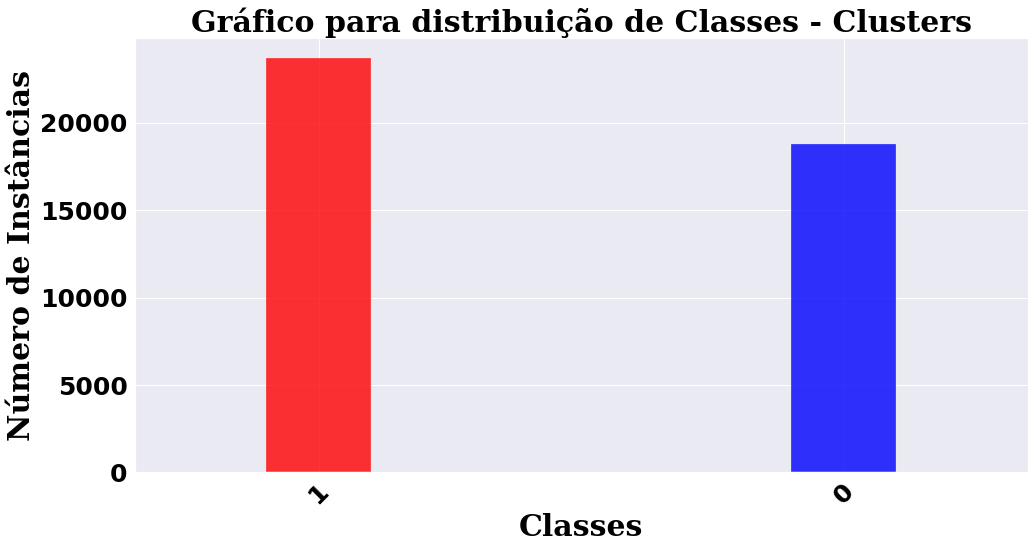

In [201]:
#Configurando os parâmetros da Figura.
plt.figure(figsize=(16, 8))


#Plotando Gráfico com Matplotlib.
df_minibatch_kmeans['Cluster'].value_counts().plot(kind='bar', color=['red', 'blue'],  alpha=0.8, width=0.2)


#Plotando Gráfico com Searborn.

#Configurações para as fontes dos textos.
font = {'family': 'serif',
        'weight': 'bold',
        'size': 16,
        }
plt.title('Gráfico para distribuição de Classes - Clusters', fontdict=font, color='black', size=30)

#Configurando título, labels e ticks
plt.xlabel('Classes', fontdict=font, color='black', size=30)
plt.ylabel('Número de Instâncias', fontdict=font, color='black', size=30)

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=25, color='black', weight="bold")
plt.yticks(size=25, color='black', weight="bold")

#Exibindo a figura.
plt.savefig('minibatch_grafico.png', format='png', quality=100)
plt.show()

# Avaliando Mini Batch K-Means

In [246]:
from sklearn import metrics
from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score

In [247]:
silhouette_score_minikmeans = silhouette_score(word_vectors.vectors, labels_minibatch_kmeans)
silhouette_score_minikmeans

0.1837365

In [248]:
calinski_harabasz_score_minikmeans = metrics.calinski_harabasz_score(word_vectors.vectors, labels_minibatch_kmeans)
calinski_harabasz_score_minikmeans

10631.97266278823

In [249]:
davies_bouldin_score_minikmeans = davies_bouldin_score(word_vectors.vectors, labels_minibatch_kmeans)
davies_bouldin_score_minikmeans

1.8627867631122903

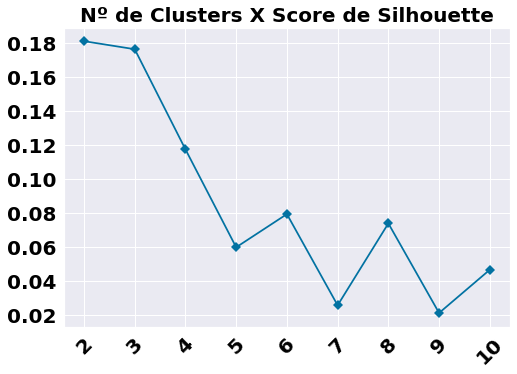

In [250]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=6)

visualizer = KElbowVisualizer(minibatch_kmeans, k=(2,11), metric='silhouette', timings=False)
visualizer.fit(word_vectors.vectors);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

#Configuração de exibição do título, e labels dos eixos x e y.    
plt.title('Nº de Clusters X Score de Silhouette', color='black', fontsize=20, weight='bold')    

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

#Salvando e Exibindo o Gráfico.
plt.savefig('minibatch_elbow_silhouette.png', format='png', quality=100)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz

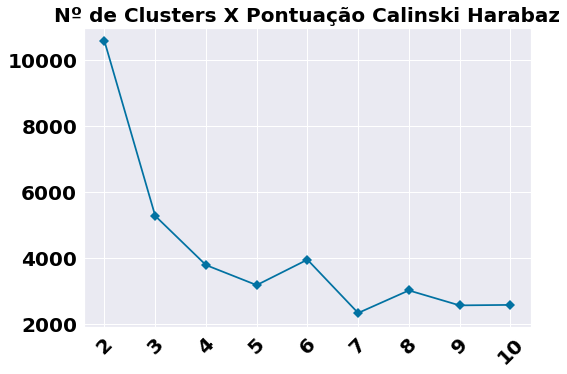

In [251]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=6)

visualizer = KElbowVisualizer(minibatch_kmeans, k=(2,11), metric='calinski_harabaz', timings=False)
visualizer.fit(word_vectors.vectors);      

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

#Configuração de exibição do título, e labels dos eixos x e y.        
plt.title('Nº de Clusters X Pontuação Calinski Harabaz', color='black', fontsize=20, weight='bold')    

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')


plt.savefig('minibatch_elbow_calinski.png', format='png', quality=100)
plt.show()

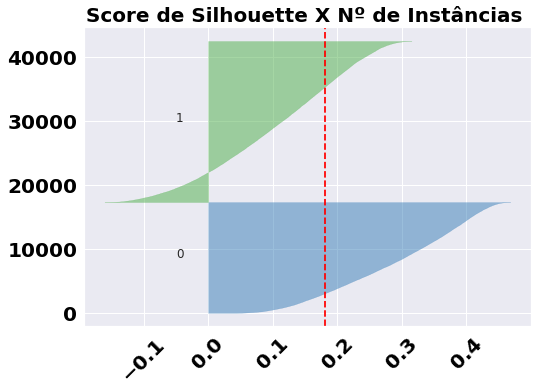

In [252]:
from yellowbrick.cluster import SilhouetteVisualizer

minibatch_kmeans = MiniBatchKMeans(n_clusters=2, random_state=0, batch_size=6)

visualizer = SilhouetteVisualizer(minibatch_kmeans, colors='yellowbrick')
visualizer.fit(word_vectors.vectors);



font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

#Configuração de exibição do título, e labels dos eixos x e y.        
plt.title('Score de Silhouette X Nº de Instâncias ', color='black', fontsize=20, weight='bold')

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

plt.savefig('minibatch_silhouette.png', format='png', quality=100, figsize=(26, 10))
plt.show()

# Aplicando DBSCAN

In [146]:
#Importando algoritmo da Biblioteca Sklearn.
from sklearn.cluster import DBSCAN

In [147]:
word_vectors = w2v_model.wv

In [148]:
#Criando instância do algoritmo e treinando o modelo com os dados.
clustering_db = DBSCAN(eps=0.5, min_samples=2).fit(X=word_vectors.vectors)

In [149]:
#Verificando os labels originados.
filter(lambda x: x[0] in [0, -1], clustering_db.labels_)
clustering_db.labels_

array([-1, -1,  0, ...,  0,  0,  0])

In [152]:
df_dbscan = pd.DataFrame(data=clustering_db.labels_, columns=['Clusters'])

In [153]:
df_dbscan

,Clusters
0,-1
1,-1
2,0
3,-1
4,-1
...,...
42502,0
42503,0
42504,0
42505,0


In [154]:
df_dbscan['Clusters'].value_counts()

 0      36005
-1       5348
 39        21
 61        14
 19        13
        ...  
 198        2
 143        2
 262        2
 111        2
 45         2
Name: Clusters, Length: 284, dtype: int64

In [ ]:
#word_vectors.similar_by_vector(model.cluster_centers_[0], topn=10, restrict_vocab=None)

In [ ]:
#word_vectors.similar_by_vector(model.cluster_centers_[1], topn=10, restrict_vocab=None)

# Avaliando DBSCAN


In [155]:
from sklearn import metrics
from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score

In [207]:
silhouette_score_db = silhouette_score(word_vectors.vectors, clustering_db.labels_)
silhouette_score_db

-0.13637288

In [222]:
calinski_harabasz_score_db = metrics.calinski_harabasz_score(word_vectors.vectors, clustering_db.labels_)
calinski_harabasz_score_db

9.063106825474442

In [209]:
davies_bouldin_score_db = davies_bouldin_score(word_vectors.vectors, clustering_db.labels_)
davies_bouldin_score_db

1.1768725149996986

In [171]:
core_samples_mask = np.zeros_like(clustering_db.labels_, dtype=bool)
core_samples_mask[clustering_db.core_sample_indices_] = True

print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(word_vectors.vectors, clustering_db.labels_))
print("Silhouette Coefficient: %0.3f" % metrics.calinski_harabasz_score(word_vectors.vectors, clustering_db.labels_))
print("Silhouette Coefficient: %0.3f" % davies_bouldin_score(word_vectors.vectors, clustering_db.labels_))

unique_labels = set(clustering_db.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (unique_labels == k)

    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = clustering_db[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Silhouette Coefficient: -0.136
Silhouette Coefficient: 9.063
Silhouette Coefficient: 1.177


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index


TypeError: ignored

In [164]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVi sualizer(clustering_db, metric='silhouette', timings=False)
#visualizer.fit(word_vectors.vectors)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

#Configuração de exibição do título, e labels dos eixos x e y.    
plt.title('Nº de Clusters X Score de Silhouette', color='black', fontsize=20, weight='bold')    

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

#Salvando e Exibindo o Gráfico.
plt.savefig('elbow_silhouette.png', format='png', quality=100)
plt.show()


ValueError: ignored

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

clustering_db = DBSCAN()
visualizer = KElbowVisualizer(clustering_db, k=(2,11), metric='calinski_harabaz', timings=False)
visualizer.fit(word_vectors.vectors);      

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

#Configuração de exibição do título, e labels dos eixos x e y.        
plt.title('Nº de Clusters X Pontuação Calinski Harabaz', color='black', fontsize=20, weight='bold')    

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')


plt.savefig('elbow_calinski.png', format='png', quality=100)
plt.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

clustering_db = DBSCAN(eps=0.5, min_samples=2)
visualizer = SilhouetteVisualizer(clustering_db, colors='yellowbrick')
visualizer.fit(word_vectors.vectors);

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

#Configuração de exibição do título, e labels dos eixos x e y.        
plt.title('Score de Silhouette X Nº de Instâncias ', color='black', fontsize=20, weight='bold')

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

plt.savefig('silhouette.png', format='png', quality=100, figsize=(26, 10))
plt.show()

# Criando Dicionário de Sentimentos

In [ ]:
#Verificando os clusters únicos.
df_kmeans['Cluster'].unique()

In [ ]:
def cast_vector(row):
    return np.array(list(map(lambda x: x.astype('double'), row)))

#Criando Vocabulário em formato de Dicionário para o sentimento das palavras.
words = pd.DataFrame(word_vectors.vocab.keys())
#Nomeando a coluna do DataFrame.
words.columns = ['words']
#Atribuindo as palavras a classe positiva ou negativa, de acordo com a clusterização.
words['vectors'] = words.words.apply(lambda x: word_vectors.wv[f'{x}'])
words['vectors_typed'] = words.vectors.apply(cast_vector)
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

*Explicação para Função Lambda que atribui um sentimento em potencial para as palavras.*

**Para atribuir uma pontuação de sentimento para cada palavra foi realizada uma multiplicação pelo quão próximos eles estavam de seu cluster (para denotar o quão potencialmente positivos / negativos os termos são). Como a pontuação que o algoritmo K-means produz é a distância de ambos os clusters, para ponderá-los corretamente, foi feita a multiplicação pelo inverso da pontuação de proximidade (divisão da pontuação de sentimento pela pontuação de proximidade).**

In [ ]:
#Para o cluster 0 atribuiu-se o sentimento como positivo e para o outro cluster atribuiu-se o sentimento negativo.
words['cluster_value'] = [1 if i==0 else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [ ]:
words.head(5)

In [ ]:
negativas = words.loc[words.sentiment_coeff < 0, ['words', 'cluster', 'sentiment_coeff']]
negativas

In [ ]:
positivas = words.loc[words.sentiment_coeff > 0, ['words', 'cluster', 'sentiment_coeff']]
positivas

In [ ]:
words.shape

In [ ]:
words.describe()['sentiment_coeff']

In [ ]:
#Importando Módulo da biblioteca Plotly,
import plotly.graph_objects as go

#Instanciando uma figura.
fig = go.Figure()

#Configurando e criando a exibição do gráfico.
fig.add_trace(go.Box(y=words['sentiment_coeff'], name='Score de Sentimento', marker_color = 'black'))

#Configurando o Layout a ser exibido.
fig.update_layout(width=700, height=700)

#Exibindo imagem.
fig.show()

In [ ]:
words[['words', 'sentiment_coeff']].to_csv('dicionario_sentimentos.csv', index=False)

# Aplicando K-Means

In [174]:
#Importando algoritmo KMeans da biblioteca Sklearn.
from sklearn.cluster import KMeans

In [175]:
#Carregando modelo Word2VEC.
word_vectors = w2v_model.wv
#Criando instância do algoritmo K-Means e passando como entrada os vetores originados pelo Word2VEC.
#n_clusters=2, max_iter=1000, random_state=True, n_init=50
model = KMeans(n_clusters=2, init='k-means++', max_iter=2000, random_state=True, n_init=50).fit(X=word_vectors.vectors)

In [176]:
negative_cluster_center = model.cluster_centers_[0]
positive_cluster_center = model.cluster_centers_[1]

In [177]:
#Verificando os vetores que foram entradas para o algoritmo, criados pelo modelo Word2VEC.
word_vectors.vectors

array([[ 0.03920221,  0.02418672,  0.03534807, ...,  0.05697024,
         0.04985305, -0.02836195],
       [ 0.05113276,  0.02677084,  0.08837863, ...,  0.01203959,
        -0.12049349, -0.04858085],
       [ 0.07041597, -0.16886258,  0.05386259, ..., -0.00436592,
        -0.04911004, -0.05984403],
       ...,
       [ 0.02637398, -0.01789502,  0.04525925, ...,  0.11696225,
        -0.00607749, -0.02810493],
       [ 0.02986428, -0.05715414,  0.06111824, ...,  0.09960712,
         0.00081152, -0.07843932],
       [ 0.03060176, -0.03815466,  0.06153009, ...,  0.09663662,
        -0.05417744, -0.04614588]], dtype=float32)

In [178]:
model.cluster_centers_

array([[ 1.74142160e-02, -3.00581306e-02,  4.58193086e-02,
         3.74406390e-02, -7.70486984e-03,  4.15707976e-02,
         6.23228922e-02, -7.74244890e-02,  2.48220284e-02,
        -2.31234431e-02, -1.34460256e-03, -3.67547125e-02,
         9.44958255e-03, -4.92210314e-02, -1.54430708e-02,
        -2.20366288e-03, -7.87601396e-02, -4.32443097e-02,
         2.09528692e-02, -7.10308105e-02, -1.48866745e-02,
         3.26427608e-03, -6.09826408e-02,  1.70509163e-02,
         7.75559992e-02, -6.93948613e-03,  2.79615149e-02,
        -2.54747141e-02,  1.08195590e-02, -2.88126171e-02,
         9.37882252e-03, -4.83424589e-03,  6.19543716e-03,
        -2.16966569e-02, -2.34434698e-02,  3.86007875e-02,
        -1.91970449e-03,  4.32942808e-02, -1.08351894e-02,
        -2.19656378e-02,  4.23622765e-02,  2.42025964e-02,
        -1.42353484e-02, -8.44852030e-02,  2.25025043e-02,
        -3.52703407e-02,  3.32153514e-02,  1.28840497e-02,
        -7.95544684e-02,  7.54294544e-02, -7.34926909e-0

In [179]:
distance = model.fit_transform(X=word_vectors.vectors)

In [180]:
distance

array([[1.1028515 , 1.1383373 ],
       [0.9950766 , 1.19015   ],
       [1.0916147 , 0.8559328 ],
       ...,
       [0.5384512 , 0.45559472],
       [0.29936936, 0.62949514],
       [0.4554071 , 0.9146142 ]], dtype=float32)

In [181]:
len(model.labels_)

42507

In [182]:
#Verificando os labels originados pelo modelo.
labels = model.labels_
labels

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [183]:
#Criando DataFrame com as classificações para os tweets.
df_kmeans = pd.DataFrame(data=model.labels_, columns=['Cluster'])

In [184]:
#Visualizando o novo DataFrame criado.
df_kmeans

,Cluster
0,0
1,0
2,1
3,0
4,0
...,...
42502,1
42503,0
42504,1
42505,0


In [185]:
#Distruibuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['Cluster'].value_counts()

0    23969
1    18538
Name: Cluster, dtype: int64

In [186]:
#Porcentagem que representa a distribuição das sentenças nos clusters pelo algoritmo K-Means.
df_kmeans['Cluster'].value_counts(normalize=True)

0    0.563884
1    0.436116
Name: Cluster, dtype: float64

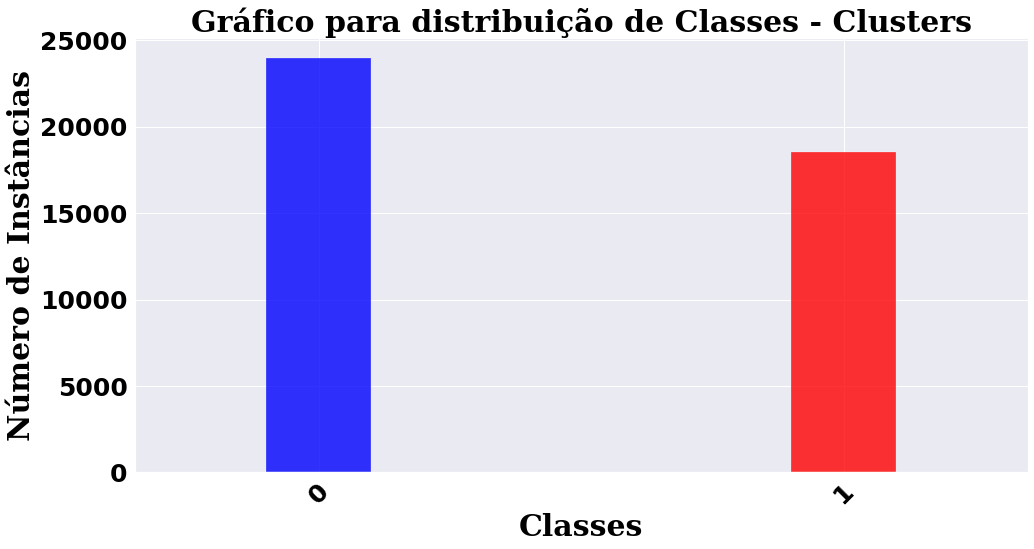

In [187]:
#Configurando os parâmetros da Figura.
plt.figure(figsize=(16, 8))


#Plotando Gráfico com Matplotlib.
df_kmeans['Cluster'].value_counts().plot(kind='bar', color=['blue', 'red'],  alpha=0.8, width=0.2)


#Plotando Gráfico com Searborn.

#Configurações para as fontes dos textos.
font = {'family': 'serif',
        'weight': 'bold',
        'size': 16,
        }
plt.title('Gráfico para distribuição de Classes - Clusters', fontdict=font, color='black', size=30)

#Configurando título, labels e ticks
plt.xlabel('Classes', fontdict=font, color='black', size=30)
plt.ylabel('Número de Instâncias', fontdict=font, color='black', size=30)

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=25, color='black', weight="bold")
plt.yticks(size=25, color='black', weight="bold")

#Exibindo a figura.
plt.savefig('grafico.png', format='png', quality=100)
plt.show()

# Avaliando K-Means


https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

In [ ]:
from sklearn import metrics
from sklearn.metrics import silhouette_score 
from sklearn.metrics import davies_bouldin_score

In [205]:
silhouette_score_kmeans = silhouette_score(word_vectors.vectors, labels)
silhouette_score_kmeans

0.18330534

In [204]:
calinski_harabasz_score_kmeans = metrics.calinski_harabasz_score(word_vectors.vectors, labels)
calinski_harabasz_score_kmeans

10634.917369296974

In [206]:
davies_bouldin_score_kmeans = davies_bouldin_score(word_vectors.vectors, labels)
davies_bouldin_score_kmeans

1.8564354803747178

In [199]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_clusters=2, init='k-means++', max_iter=2000, random_state=True, n_init=50)

visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)
visualizer.fit(word_vectors.vectors)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

#Configuração de exibição do título, e labels dos eixos x e y.    
plt.title('Nº de Clusters X Score de Silhouette', color='black', fontsize=20, weight='bold')    

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

#Salvando e Exibindo o Gráfico.
plt.savefig('elbow_silhouette.png', format='png', quality=100)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(n_clusters=2, init='k-means++', max_iter=2000, random_state=True, n_init=50)
visualizer = KElbowVisualizer(model, k=(2,11), metric='calinski_harabaz', timings=False)
visualizer.fit(word_vectors.vectors);      

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

#Configuração de exibição do título, e labels dos eixos x e y.        
plt.title('Nº de Clusters X Pontuação Calinski Harabaz', color='black', fontsize=20, weight='bold')    

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')


plt.savefig('elbow_calinski.png', format='png', quality=100)
plt.show()

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(n_clusters=2, init='k-means++', max_iter=2000, random_state=True, n_init=50)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(word_vectors.vectors);



font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 15,
        }

#Configuração de exibição do título, e labels dos eixos x e y.        
plt.title('Score de Silhouette X Nº de Instâncias ', color='black', fontsize=20, weight='bold')

#Configuração de exibição dos ticks.
plt.xticks(rotation=45, size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

plt.savefig('silhouette.png', format='png', quality=100, figsize=(26, 10))
plt.show()

# Comparando os Três Algoritmos

In [215]:
import seaborn as sns
sns.set_style('darkgrid')

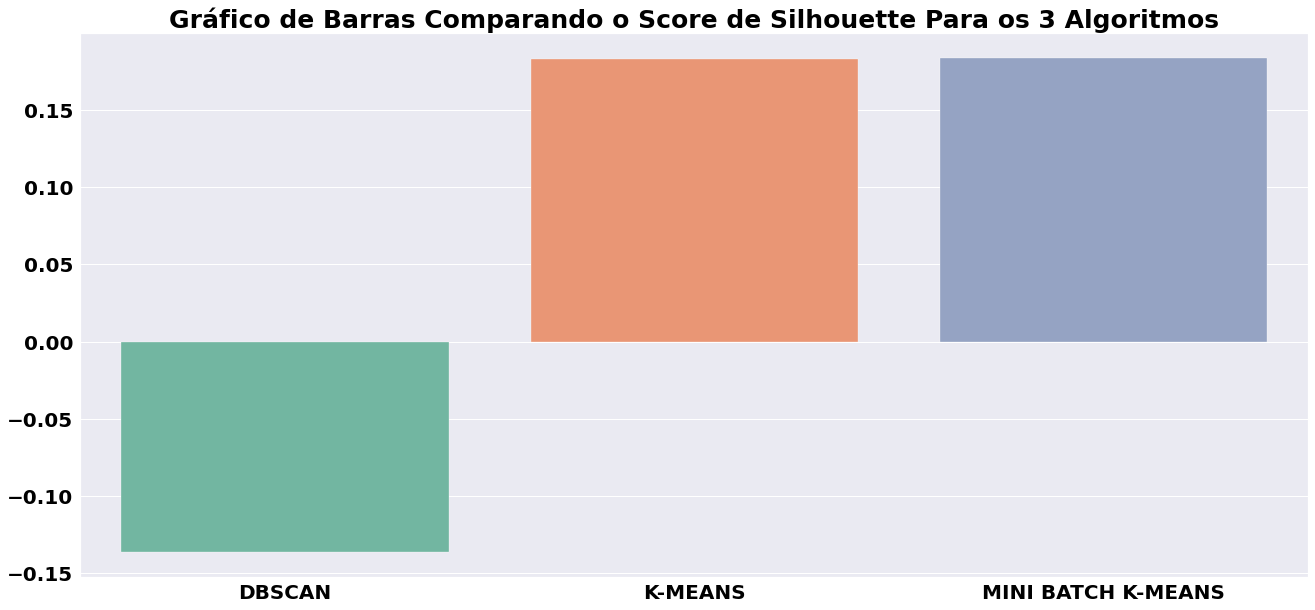

In [245]:
#Silhouette

plt.figure(figsize=(22, 10))
sns.barplot(x=['DBSCAN', 'K-MEANS', 'MINI BATCH K-MEANS'],  
            y=[silhouette_score_db, silhouette_score_kmeans, silhouette_score_minikmeans],
            palette='Set2')

plt.title('Gráfico de Barras Comparando o Score de Silhouette Para os 3 Algoritmos', size=25, color='black', weight='bold')

plt.xticks(size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

plt.savefig('comparacao_silhouette.png', format='png', quality=100, figsize=(22, 10));
plt.show();

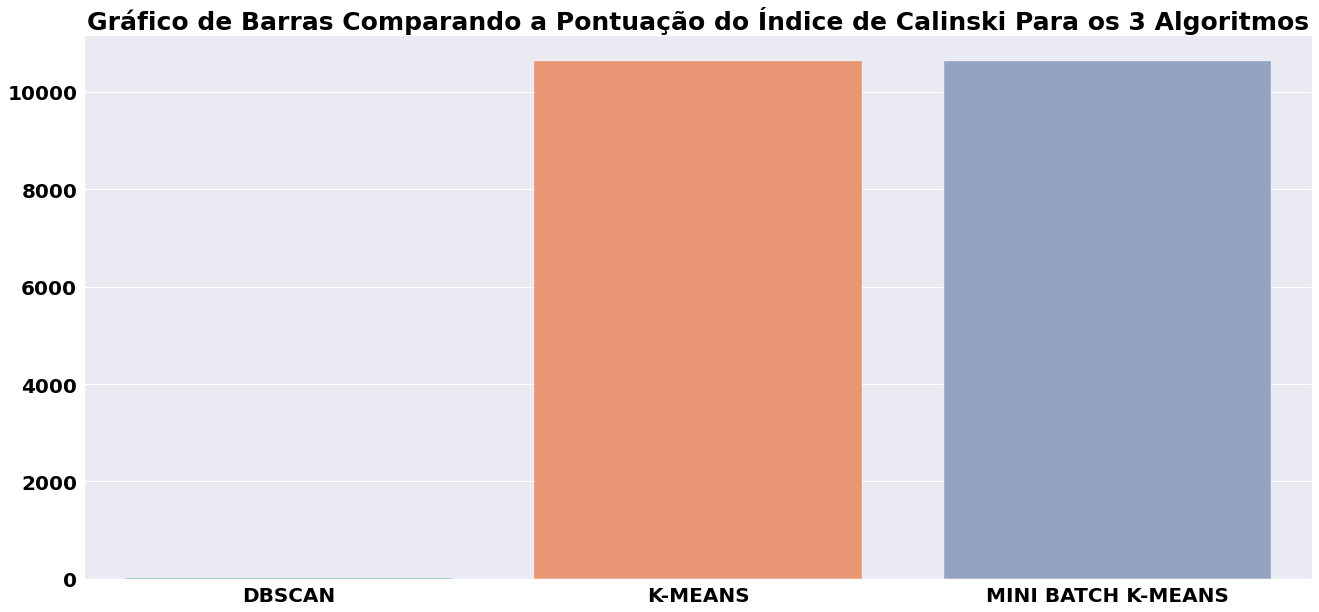

In [244]:
#Calinski

plt.figure(figsize=(22, 10))

sns.barplot(x=['DBSCAN', 'K-MEANS', 'MINI BATCH K-MEANS'], 
            y=[calinski_harabasz_score_db, calinski_harabasz_score_kmeans, calinski_harabasz_score_minikmeans],
            palette='Set2')

plt.title('Gráfico de Barras Comparando a Pontuação do Índice de Calinski Para os 3 Algoritmos', size=25, color='black', weight='bold')

plt.xticks(size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

plt.savefig('comparacao_Calinski.png', format='png', quality=100, figsize=(22, 10));
plt.show();

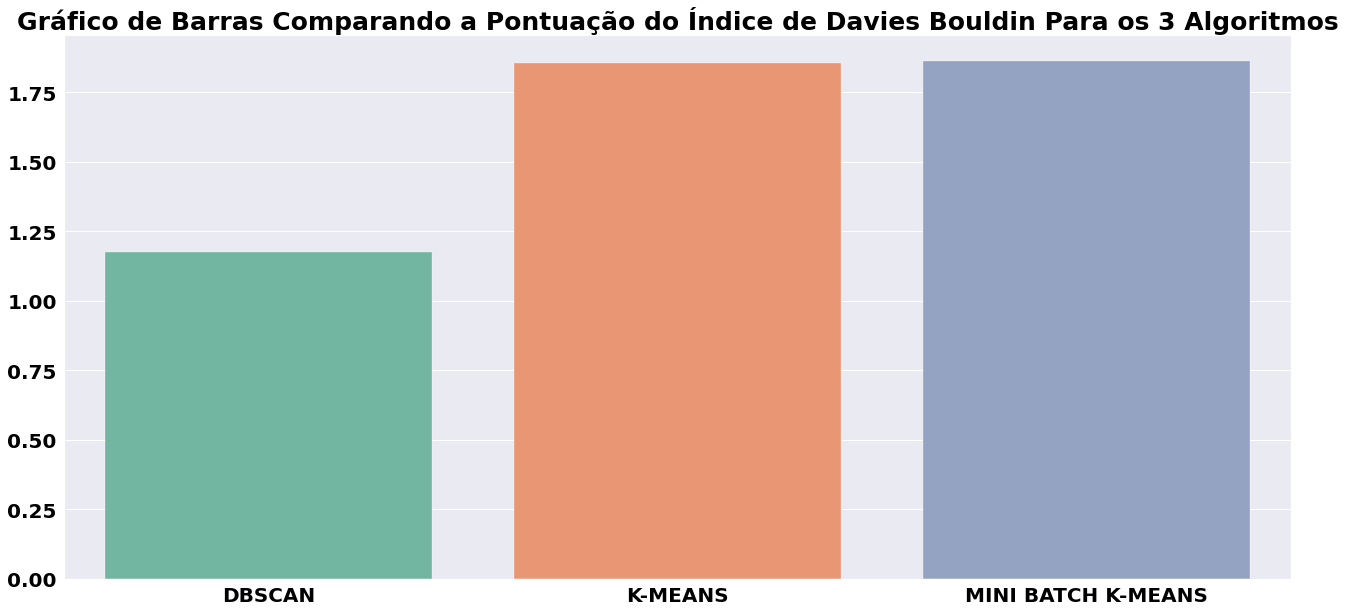

In [243]:
#Davies Bouldin

plt.figure(figsize=(22, 10))


sns.barplot(x=['DBSCAN', 'K-MEANS', 'MINI BATCH K-MEANS'], 
            y=[davies_bouldin_score_db, davies_bouldin_score_kmeans, davies_bouldin_score_minikmeans],
            palette='Set2')

plt.title('Gráfico de Barras Comparando a Pontuação do Índice de Davies Bouldin Para os 3 Algoritmos', size=25, color='black', weight='bold')

plt.xticks(size=20, color='black', weight='bold')
plt.yticks(size=20, color='black', weight='bold')

plt.savefig('comparacao_Bouldin.png', format='png', quality=100);
plt.show();